# Loading librarys, data and models

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib

In [ ]:

# Salvar o modelo KMeans em um arquivo
#joblib.dump(kmeans, 'modelo_kmeans.pkl')

# Carregar o modelo KMeans de volta
kmeans = joblib.load('modelo_kmeans.pkl')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab/perfumes_completo.csv')

In [ ]:
df.shape

(40248, 1417)

In [ ]:
# Criando uma copia do df
df2 = df.copy()

# Selecionar todas as colunas exceto a coluna 'Element'
dados_clusterizacao = df2.drop(columns=['Element','Unnamed: 0'])

# Avaliando qual melhor numero de grupos

100%|██████████| 10/10 [2:15:52<00:00, 815.26s/it] 


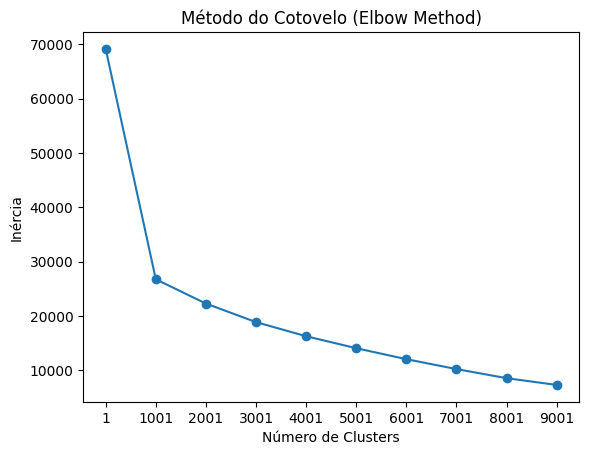

In [ ]:
# Selecionar todas as colunas exceto a coluna 'Element'
dados_clusterizacao = df2.drop(columns=['Element','Unnamed: 0'])

# Lista para armazenar as inércias
inertias = []

# Faixa de números de clusters que você deseja testar
num_centroids_range = range(1, 10001,1000)  # Testando de 1 a 20 clusters

# Loop sobre o número de clusters
for k in tqdm(num_centroids_range):
    # Inicializar e ajustar o modelo KMeans
    kmeans = KMeans(n_clusters=k, n_init=1)
    kmeans.fit(dados_clusterizacao)

    # Armazenar a inércia
    inertias.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo (Elbow)
plt.plot(num_centroids_range, inertias, marker='o')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(num_centroids_range)
plt.show()

In [ ]:
# Escolher o número de clusters
numero_clusters = 1000

# Inicializar o modelo KMeans
kmeans = KMeans(n_clusters=numero_clusters, n_init=10)

# Treinar o modelo nos dados
kmeans.fit(dados_clusterizacao)

# Adicionar os rótulos dos clusters de volta ao DataFrame original
df2['cluster'] = kmeans.labels_

In [ ]:
# Salvar o modelo KMeans em um arquivo
joblib.dump(kmeans, 'modelo_kmeans.pkl')

['modelo_kmeans.pkl']

# Clusterizando

In [ ]:
# Adicionar os rótulos dos clusters de volta ao DataFrame original
df2['cluster'] = kmeans.labels_

In [ ]:
def recomendar(dados_clusterizacao, df2, kmeans, samples):
  # Lista com o nome de todas as colunas do DataFrame original
  todas_colunas = dados_clusterizacao.columns.tolist()

  # Selecionando aleatoriamente 5 colunas do DataFrame original
  colunas_aleatorias = dados_clusterizacao.sample(samples, axis=1)

  # Criando um DataFrame com todas as colunas
  df3 = pd.DataFrame(columns=dados_clusterizacao.columns)

  # Criando um dicionário para armazenar as respostas
  respostas_dict = {}

  # Iterando sobre as colunas selecionadas aleatoriamente
  for column in colunas_aleatorias.columns:
      # Pedindo entrada do usuário para cada coluna
      resposta = input(f"Você gosta de {column}? ")
      # Armazenando a resposta no dicionário
      respostas_dict[column] = resposta

  colunas = list(respostas_dict.keys())

  # Transformar o dicionário em um DataFrame
  df_respostas = pd.DataFrame.from_dict(respostas_dict, orient='index').T

  # Mesclar os DataFrames df3 e df_respostas
  df_final = pd.merge(df3, df_respostas, on=colunas, how='outer')
  df_final = df_final[df3.columns]
  df_final = df_final.fillna(0)

  # Obter os rótulos dos clusters para os dados de df_final
  labels = kmeans.predict(df_final)

  # Filtrar o DataFrame df2 para encontrar as linhas com os clusters correspondentes
  recomendações = df2['Element'][df2['cluster'].isin(labels)]

  return recomendações



In [ ]:
# EScolhendo a quantidade de notas
samples = 10

recomendados = recomendar(dados_clusterizacao, df2, kmeans, samples)

Você gosta de Indian woods? 1
Você gosta de Datura? 1
Você gosta de Cajú? 1
Você gosta de Jasmim-da-Índia? 0
Você gosta de Abrunheiro? 0
Você gosta de Murta? 1
Você gosta de Doce de Calisson? 0
Você gosta de Calypsone? 1
Você gosta de Morango Gariguette? 0
Você gosta de Longoza? 1


In [ ]:
recomendados

255                              A La Lune Trinity Blood
690                       Acqua dell Elba Classica Women
693            Acqua dell Elba Essenza di un'Isola Acqua
699                        Acqua di Firenze Venus Marina
771      Acqua di Sardegna Desvélos Unisex Eau de Parfum
                              ...                       
37080        Valentino Valentino Noir Absolu Oud Essence
37191                Velvet & Sweet Pea’s Purrfumery Eze
37281                          Versace Jeans Couture Man
38412                                     Womo Black Oud
38483                                     Xerjoff Aubres
Name: Element, Length: 139, dtype: object